In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title --
import pandas as pd

to_what = 250000

# DataFrame oluştur
df = pd.read_csv(f'/content/drive/MyDrive/0-{to_what}_result_0.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_axis(df['Timestamp'], copy=False)
df.drop(columns=['Date', 'Timestamp'], inplace=True)

df

UI/UX  Bugs/stability   Content  Subscription/payment  \
Timestamp                                                              
2021-11-02  0.031674        0.067873  0.045249              0.022624   
2021-11-03  0.036313        0.111732  0.030726              0.030726   
2021-11-04  0.056022        0.134454  0.030812              0.042017   
2021-11-05  0.026490        0.076159  0.039735              0.033113   
2021-11-06  0.028902        0.066474  0.057803              0.043353   
...              ...             ...       ...                   ...   
2023-11-11  0.028926        0.103306  0.070248              0.053719   
2023-11-12  0.042017        0.071429  0.096639              0.088235   
2023-11-13  0.012552        0.138075  0.066946              0.046025   
2023-11-14  0.019417        0.053398  0.048544              0.087379   
2023-11-15  0.065990        0.101523  0.055838              0.086294   

            Downloading/connection  Customer service       Any  \
Timestamp                                                        
2021-11-02                0.018100          0.013575  0.185520   
2021-11-03                0.027933          0.002793  0.231844   
2021-11-04                0.036415          0.008403  0.285714   
2021-11-05                0.029801          0.003311  0.201987   
2021-11-06                0.034682          0.002890  0.225434   
...                            ...               ...       ...   
2023-11-11                0.028926          0.004132  0.276860   
2023-11-12                0.016807          0.008403  0.294118   
2023-11-13                0.029289          0.012552  0.271967   
2023-11-14                0.043689          0.004854  0.257282   
2023-11-15                0.035533          0.005076  0.319797   

            Total item count  
Timestamp                     
2021-11-02               221  
2021-11-03               358  
2021-11-04               357  
2021-11-05               302  
2021-11-06               346  
...                      ...  
2023-11-11               242  
2023-11-12               238  
2023-11-13               239  
2023-11-14               206  
2023-11-15               197  

[744 rows x 8 columns]

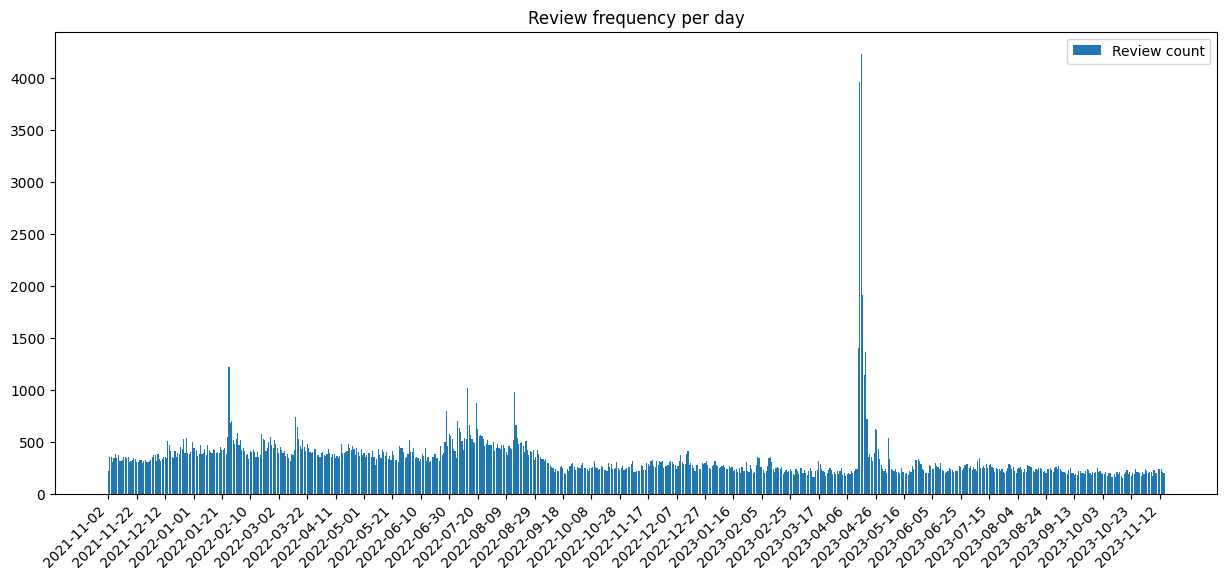

In [ ]:
#@title Review frequency
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))
plt.bar(df.index.values, df["Total item count"], label="Review count")
plt.legend(loc='upper right')  # Renk legendini ekleyin
plt.title("Review frequency per day")
plt.xticks(df.index.values[::20],rotation=45, ha='right')
plt.show()

In [ ]:
#@title Time - Single aspect
from matplotlib import pyplot as plt

which_aspect = "Customer service"

all_aspects = ['Content','Customer service', 'Bugs/stability', 'UI/UX', 'Subscription/payment', 'Downloading/connection', 'Total item count', 'Any']
all_aspects.remove(which_aspect)

df_single = df.drop(columns=all_aspects)

plt.plot(df_single)
plt.title(which_aspect)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
single_aspect_data = df_single[which_aspect].values
single_aspect_data = single_aspect_data.reshape((-1,1))
date_single_aspect_data = df_single.index.values

split_percent = 0.80
split = int(split_percent*len(single_aspect_data))

single_aspect_train = single_aspect_data[:split]
single_aspect_test = single_aspect_data[split:]

date_train = df_single.index.values[:split]
date_test = df_single.index.values[split:]

print(len(single_aspect_train))
print(len(single_aspect_test))

595
149


In [ ]:
from keras.utils import timeseries_dataset_from_array

look_back = 10

train_generator = timeseries_dataset_from_array(single_aspect_train, single_aspect_train, sequence_length=look_back, batch_size=20)
test_generator = timeseries_dataset_from_array(single_aspect_test, single_aspect_test, sequence_length=look_back, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(50,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 100
model.fit(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/100
30/30 [==============================] - 2s 7ms/step - loss: 2.2991e-05
Epoch 2/100
30/30 [==============================] - 0s 8ms/step - loss: 1.9575e-05
Epoch 3/100
30/30 [==============================] - 0s 8ms/step - loss: 1.9601e-05
Epoch 4/100
30/30 [==============================] - 0s 7ms/step - loss: 1.9628e-05
Epoch 5/100
30/30 [==============================] - 0s 6ms/step - loss: 1.9648e-05
Epoch 6/100
30/30 [==============================] - 0s 7ms/step - loss: 1.9665e-05
Epoch 7/100
30/30 [==============================] - 0s 6ms/step - loss: 1.9571e-05
Epoch 8/100
30/30 [==============================] - 0s 6ms/step - loss: 1.9587e-05
Epoch 9/100
30/30 [==============================] - 0s 7ms/step - loss: 1.9453e-05
Epoch 10/100
30/30 [==============================] - 0s 6ms/step - loss: 1.9367e-05
Epoch 11/100
30/30 [==============================] - 0s 7ms/step - loss: 1.9279e-05
Epoch 12/100
30/30 [==============================] - 0s 6ms/step - loss: 

In [ ]:
import plotly.graph_objs as go

prediction = model.predict(test_generator)

single_aspect_train = single_aspect_train.reshape((-1))
single_aspect_test = single_aspect_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = single_aspect_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = single_aspect_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "Dissatisfaction Rates",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : which_aspect}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

145/145 [==============================] - 1s 4ms/step


In [ ]:
df

UI/UX  Bugs/stability   Content  Subscription/payment  \
Timestamp                                                              
2021-11-02  0.031674        0.067873  0.045249              0.022624   
2021-11-03  0.036313        0.111732  0.030726              0.030726   
2021-11-04  0.056022        0.134454  0.030812              0.042017   
2021-11-05  0.026490        0.076159  0.039735              0.033113   
2021-11-06  0.028902        0.066474  0.057803              0.043353   
...              ...             ...       ...                   ...   
2023-11-11  0.028926        0.103306  0.070248              0.053719   
2023-11-12  0.042017        0.071429  0.096639              0.088235   
2023-11-13  0.012552        0.138075  0.066946              0.046025   
2023-11-14  0.019417        0.053398  0.048544              0.087379   
2023-11-15  0.065990        0.101523  0.055838              0.086294   

            Downloading/connection  Customer service       Any  \
Timestamp                                                        
2021-11-02                0.018100          0.013575  0.185520   
2021-11-03                0.027933          0.002793  0.231844   
2021-11-04                0.036415          0.008403  0.285714   
2021-11-05                0.029801          0.003311  0.201987   
2021-11-06                0.034682          0.002890  0.225434   
...                            ...               ...       ...   
2023-11-11                0.028926          0.004132  0.276860   
2023-11-12                0.016807          0.008403  0.294118   
2023-11-13                0.029289          0.012552  0.271967   
2023-11-14                0.043689          0.004854  0.257282   
2023-11-15                0.035533          0.005076  0.319797   

            Total item count  
Timestamp                     
2021-11-02               221  
2021-11-03               358  
2021-11-04               357  
2021-11-05               302  
2021-11-06               346  
...                      ...  
2023-11-11               242  
2023-11-12               238  
2023-11-13               239  
2023-11-14               206  
2023-11-15               197  

[744 rows x 8 columns]

In [ ]:
import numpy as np

single_aspect_data = single_aspect_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = single_aspect_data[-look_back:]

    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]

    return prediction_list

def predict_dates(num_prediction):
    last_date = df.index.values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 20
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

1/1 [==============================] - 0s 31ms/step


In [ ]:
import plotly.graph_objs as go

prediction = model.predict(test_generator)

single_aspect_train = single_aspect_train.reshape((-1))
single_aspect_test = single_aspect_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_single_aspect_data,
    y = single_aspect_data,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = forecast_dates,
    y = forecast,
    mode = 'lines',
    name = 'Forecast'
)
layout = go.Layout(
    title = "Dissatisfaction Rates",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : which_aspect}
)
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

145/145 [==============================] - 0s 3ms/step
